In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics



Read CSV

In [47]:
df = pd.read_csv('TrainingData2.csv', encoding='latin-1')
df.head()

,Map_Name,Map_Text
0,Restaurante,SUBWAY MULTIPLAZA ESCA
1,Gasolina,SERVICENTRO EL HIGUERO
2,Restaurante,LA FABRICA PIZZERIA CU
3,Restaurante,ROSTIPOLLOS
4,Supermercado,AUTO MERCADO PL/DEL SO


Add Category Id

In [79]:
df['category_id'] = df['Map_Name'].factorize()[0]
category_id_df = df[['Map_Name', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Map_Name']].values)
df

,Map_Name,Map_Text,category_id
0,Restaurante,SUBWAY MULTIPLAZA ESCA,0
1,Gasolina,SERVICENTRO EL HIGUERO,1
2,Restaurante,LA FABRICA PIZZERIA CU,0
3,Restaurante,ROSTIPOLLOS,0
4,Supermercado,AUTO MERCADO PL/DEL SO,2
5,Restaurante,HOOLIGANS,0
6,Diversion,JUMP CENTER,3
7,Restaurante,RESTAURANTE TACO BELL,0
8,Software,Spotify P0441BF56D,4
9,Restaurante,TERIYAKI MULTIPLAZA ES,0


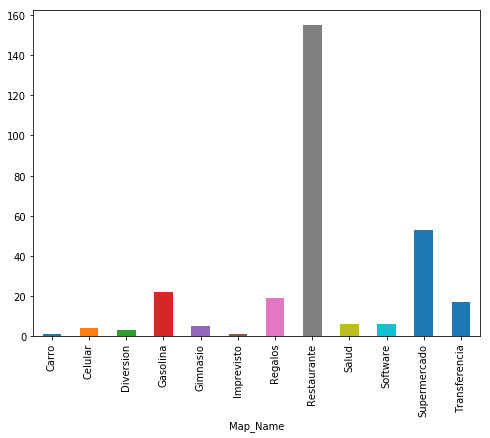

In [49]:
fig = plt.figure(figsize=(8,6))
df.groupby('Map_Name').Map_Text.count().plot.bar(ylim=0)
plt.show()

In [50]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Map_Text).toarray()
labels = df.category_id
features.shape

(292, 67)

In [51]:
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Carro':
  . Most correlated unigrams:
. subway
. del
  . Most correlated bigrams:
. del sol
. subway latina
# 'Celular':
  . Most correlated unigrams:
. subway
. del
  . Most correlated bigrams:
. del sol
. subway latina
# 'Diversion':
  . Most correlated unigrams:
. del
. auto
  . Most correlated bigrams:
. del sol
. subway latina
# 'Gasolina':
  . Most correlated unigrams:
. galera
. servicentro
  . Most correlated bigrams:
. servicentro el
. servicentro la
# 'Gimnasio':
  . Most correlated unigrams:
. subway
. del
  . Most correlated bigrams:
. del sol
. subway latina
# 'Imprevisto':
  . Most correlated unigrams:
. del
. curridabat
  . Most correlated bigrams:
. del sol
. subway latina
# 'Regalos':
  . Most correlated unigrams:
. auto
. carlos
  . Most correlated bigrams:
. subway latina
. san carlos
# 'Restaurante':
  . Most correlated unigrams:
. auto
. subway
  . Most correlated bigrams:
. auto mercado
. subway latina
# 'Salud':
  . Most correlated unigrams:
. san
. plaza
  . 

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df['Map_Text'], df['Map_Name'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = LogisticRegression().fit(X_train_tfidf, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [155]:
results = clf.predict(count_vect.transform(["subway"]))
prob_per_class_dictionary = dict(zip(model.classes_, results))

print(prob_per_class_dictionary)


{0: 'Restaurante'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of 

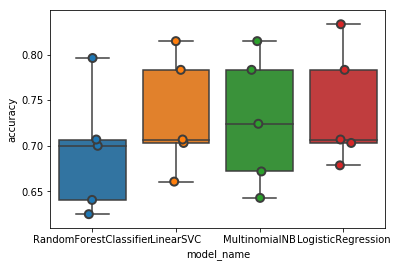

In [54]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [55]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.733777
LogisticRegression        0.741052
MultinomialNB             0.727404
RandomForestClassifier    0.693764
Name: accuracy, dtype: float64

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


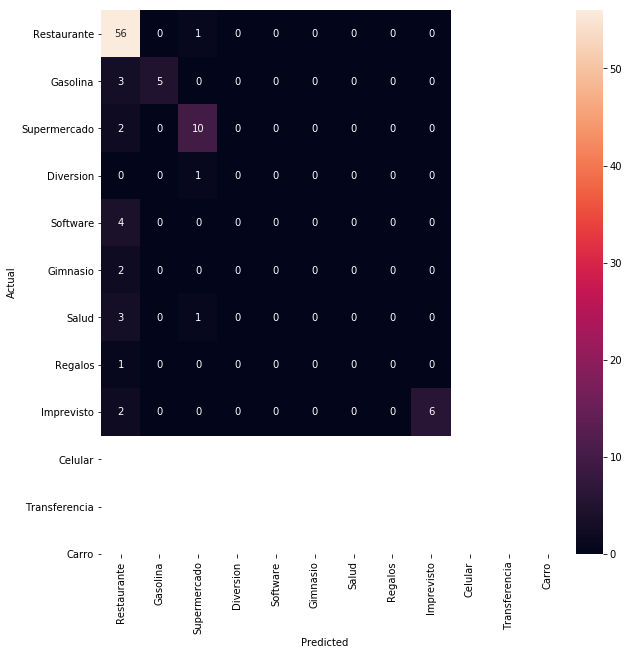

In [67]:
model = LogisticRegression()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Map_Name.values, yticklabels=category_id_df.Map_Name.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f780090e550>],
      dtype=object)

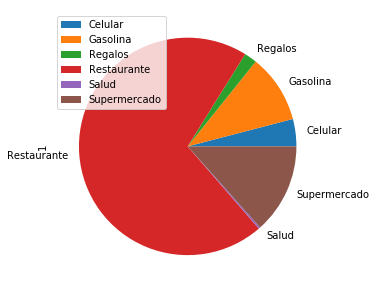

In [151]:
pd.options.display.float_format = '{:,.2f}'.format
test_data = pd.read_csv('TestData2.csv',header=None,encoding='latin-1' ,error_bad_lines=False)
test_data.head()
print()
clf.predict(count_vect.transform(list(test_data[0])))
test_data["predicted"] = clf.predict(count_vect.transform(list(test_data[0])))

test_data.groupby(['predicted']).sum()
test_data.groupby(['predicted']).sum().plot.pie( subplots=True,figsize=(5, 5))
